In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.utils.data_utils import get_file
from keras import regularizers

tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17089111066876162014, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15951632205314744621
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5368982714648620127
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11746027789484493138
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 256)        

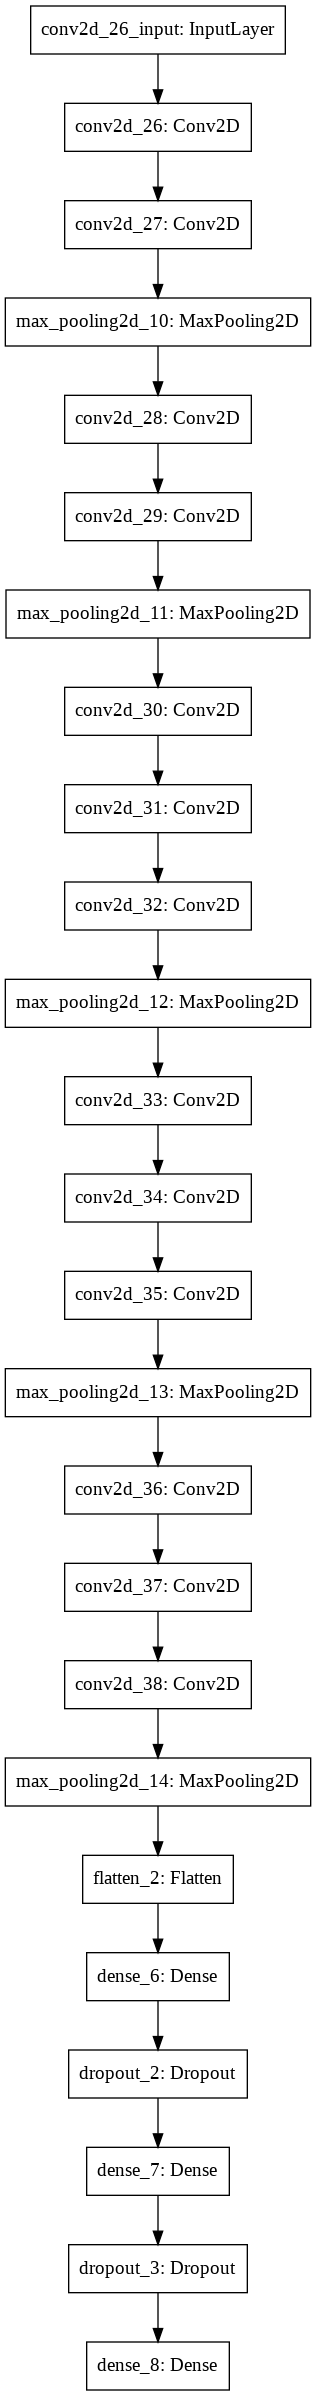

In [15]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# mean = np.mean(x_train,axis=(0,1,2,3))
# std = np.std(x_train, axis=(0, 1, 2, 3))
# x_train = (x_train-mean)/(std+1e-7)
# x_test  = (x_test-mean)/(std+1e-7)


y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# Variables
batch_size = 128
num_classes = 10
epochs = 10
iterations = 391
weight_decay = 0.0001
log_filepath = r'./vgg16_pretain/'

def scheduler(epoch):
    if epoch <= 80:
        return 0.01
    if epoch <= 140:
        return 0.005
    return 0.001

# WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
# filepath = get_file('vgg19_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')


# my model - VGG16
model = keras.Sequential()
# Block 1
model.add(keras.layers.Conv2D(64,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(64,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 2
model.add(keras.layers.Conv2D(128,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(128,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 3
model.add(keras.layers.Conv2D(256,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(256,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(256,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 4
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Block 5
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Conv2D(512,  kernel_size=(3,3), activation='relu',input_shape=(32,32,3),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [17]:
# Optimizer setting
sgd = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
datagen.fit(x_train)


# history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test,y_test))
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=iterations,
                    epochs=epochs,
                    callbacks=cbks,
                    validation_data=(x_test, y_test))

# Saving the model
save_dir = 'drive/My Drive/Colab Notebooks'
model_name = 'cifar10.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Evaluate
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Accuracy',test_acc)

Epoch 1/10
391/391 [==============================] - 26s 68ms/step - loss: nan - accuracy: 0.0977 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 26s 67ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 26s 67ms/step - loss: nan - accuracy: 0.0964 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 26s 67ms/step - loss: nan - accuracy: 0.0970 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 26s 67ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 26s 66ms/step - loss: nan - accuracy: 0.0973 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 26s 66ms/step - loss: nan - accuracy: 0.0962 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/10
391/391 [==============

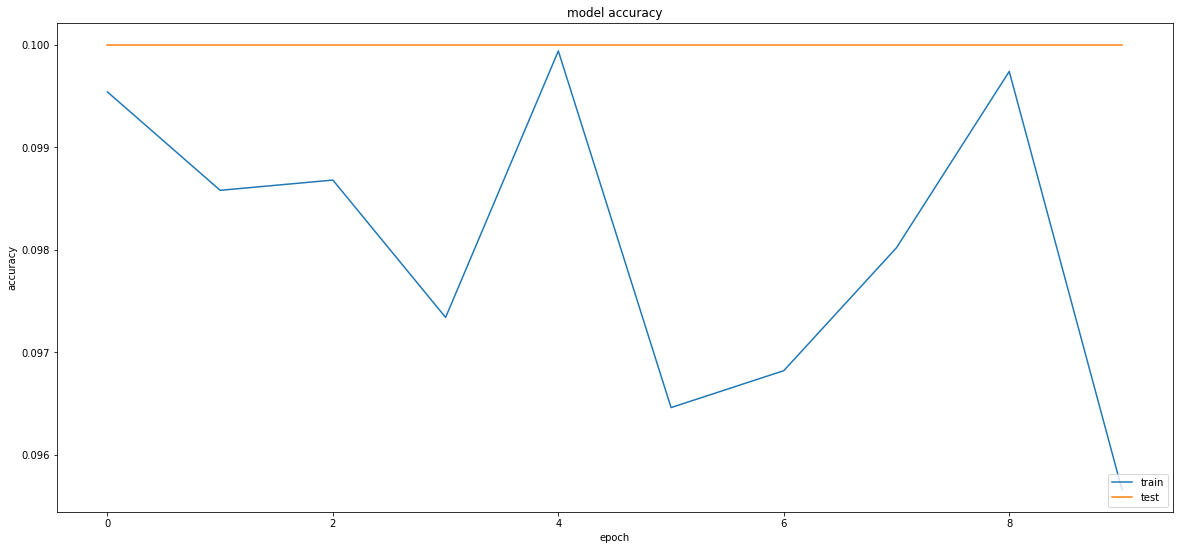

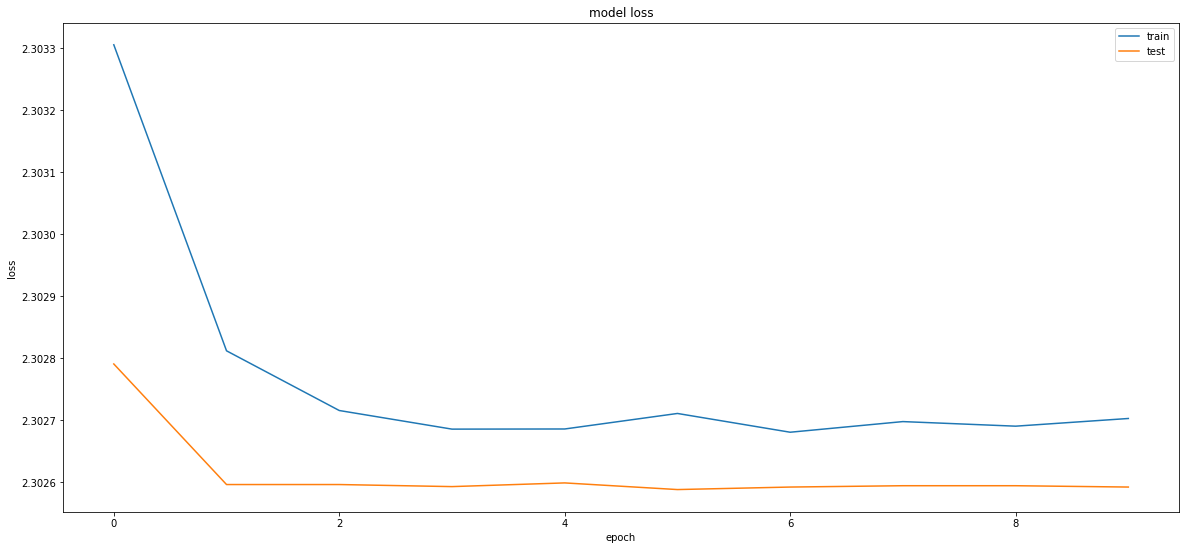

In [18]:
# Plotting the metrics
fig = plt.figure()
#plt.subplot(2,1,1)
plt.plot()
# plt.scatter(history.history['accuracy'],history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.show()

#plt.subplot(2,1,2)
plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('model_loss.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

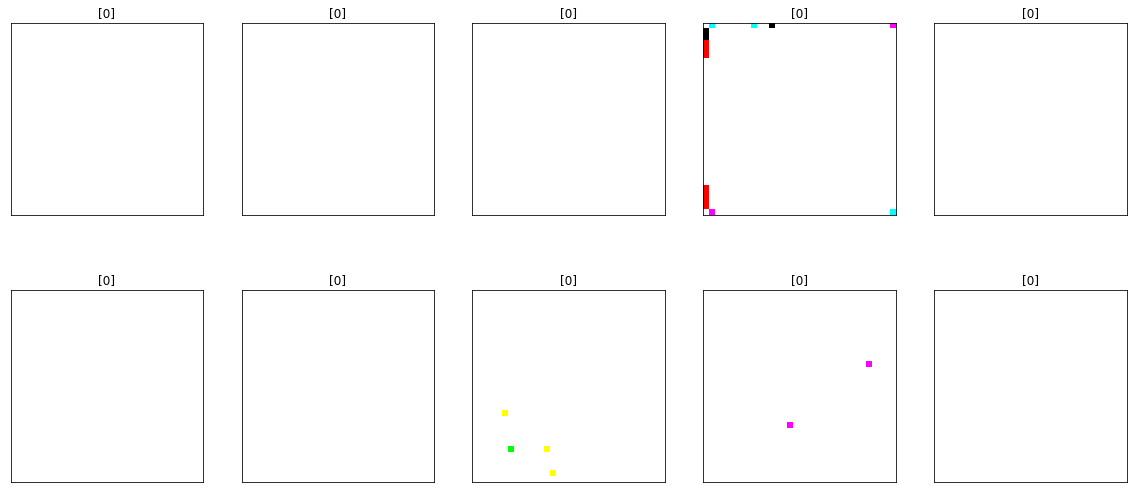

In [19]:
# Predict
# 0 = Airplane, 1 = Automobile, 2 = Bird, 3 = Cat, 4 = Deer
# 5 = Dog, 6 = Frog, 7 = Horse, 8 = Ship, 9 = Truck
from random import randint

for i in range(10):  
    plt.subplot(2,5,i+1)
    plt.rcParams["figure.figsize"] = (20,9)
    index = randint(0,9999)
    plt.imshow(x_train[index])
    plt.xticks([])
    plt.yticks([])
    prediction = model.predict_classes(x_train[index].reshape(1,32,32,3))
    plt.title(prediction)
    plt.savefig('test_set.png')
plt.show()



In [26]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
#import data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

weight_decay = 0.0005
nb_epoch=100
batch_size=32

#layer1 32*32*3
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#layer2 32*32*64
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer3 16*16*64
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer4 16*16*128
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer5 8*8*128
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer6 8*8*256
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer7 8*8*256
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer8 4*4*256
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer9 4*4*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer10 4*4*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer11 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer12 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer13 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#layer14 1*1*512
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer15 512
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer16 512
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
# 10

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

model.fit(x_train,y_train,epochs=nb_epoch, batch_size=batch_size,
             validation_split=0.1, verbose=1)

test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Accuracy',test_acc)

Epoch 1/100
1407/1407 [==============================] - 33s 23ms/step - loss: 7.3496 - accuracy: 0.2106 - val_loss: 6.6542 - val_accuracy: 0.1626
Epoch 2/100
1407/1407 [==============================] - 32s 23ms/step - loss: 5.7191 - accuracy: 0.2913 - val_loss: 6.1469 - val_accuracy: 0.2624
Epoch 3/100
1407/1407 [==============================] - 32s 23ms/step - loss: 4.4333 - accuracy: 0.3974 - val_loss: 4.1796 - val_accuracy: 0.3870
Epoch 4/100
1407/1407 [==============================] - 32s 23ms/step - loss: 3.5743 - accuracy: 0.4904 - val_loss: 3.3402 - val_accuracy: 0.4968
Epoch 5/100
 279/1407 [====>.........................] - ETA: 24s - loss: 3.1750 - accuracy: 0.5318

KeyboardInterrupt: ignored